The logistic map from an example in The [IPython Interactive Computing and Visualization Cookbook](https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/).

## Setup

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate, repeat
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Definition

$$x_n = rx_{n-1}(1-x_{n-1}); n \in \mathbb {N}, x_n \in \mathbb{R}, r \in \mathbb{R} $$

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

## Approach

The visualization has three figures, each of which shows `steps` successive iterations of $x_n$  values (as blue points) beginning with $x_0$ (`x0`, distinguished in outline) for a given $r$, `r`:

- A ("cobweb") plot of the $x_n$ as a function of $x_{n-1}$ optionally showing the transitions between iterations, with either a connecting line or, a "step" that shows the change of role from $x_n$ to $x_{n-1}$ at each iteration. Also indicated is the logistic map for $x_{n-1} \in [0,1]$.
- A plot of the $x_n$ as a function of $r$ (thus all at `r`) in the context of a bifrucation diagram showing $x_n(r)$ for all $r \in [r_l, 4.0]$, where $r_l$ is the lowest of $2.5$ or `r`, for 40 iterations starting at `bif_steps_min` (up to a maximum of 500). 
- A plot of the $x_n$ as a function of $n$, with lines connecting each iteration. 

## Visialization

interactive(children=(FloatSlider(value=3.08, description='$r$', max=4.0, min=1.0, step=0.02), IntSlider(value…

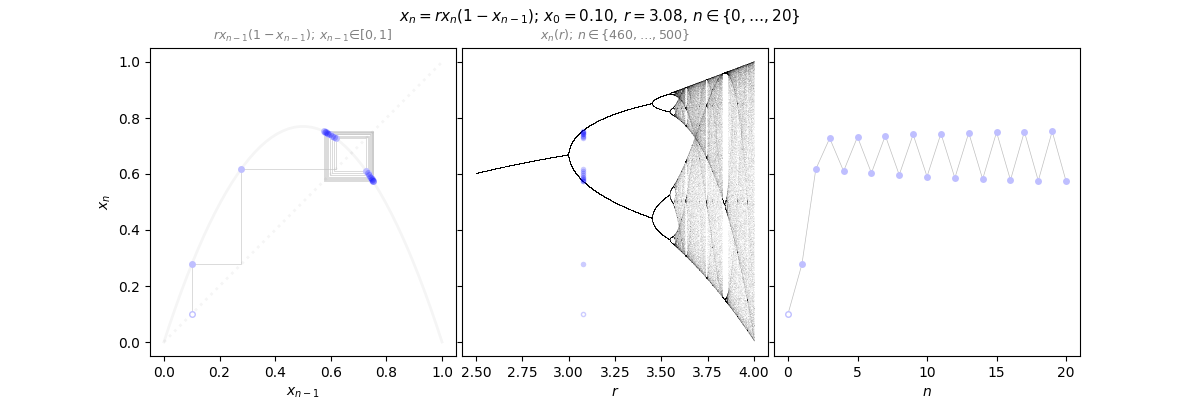

In [5]:
bif_steps_max = 500
bif_steps_show = 40

fig, (web, bif, pop) = plt.subplots(1, 3, figsize=(12,4), sharey=True)
fig.subplots_adjust(hspace=0, wspace=.02)

bif.tick_params(axis="y",direction="out")
pop.tick_params(axis="y",direction="out")

@interact(r=widgets.FloatSlider(min=1, max=4, step=0.02, value=3.08, continuous_update=True,
                               description='$r$'), 
          steps=widgets.IntSlider(min=2, max=500, step=1, value=20, continuous_update=True,
                                 description='$n_{max}$'),  
          x0=widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.1, continuous_update=True,
                                description='$x_0$'), 
          bif_steps_min=widgets.IntSlider(min=0, max=bif_steps_max-bif_steps_show, step=1, value=bif_steps_max-bif_steps_show,
                                          description='Min step in bifrucation:', style = {'description_width': 'initial'},
                                          continuous_update=True),
#           bif_steps_show=widgets.IntSlider(min=10, max=bif_steps_max, step=1, value=40,
#                                           description='Steps shown in bifrucation:', style = {'description_width': 'initial'},
#                                           continuous_update=True),
          connect_points = widgets.Dropdown(options=[('Steps (web plot)', 'steps'), ('Lines', 'lines'), ('None (Poincaré plot)', 'none')], value='steps', 
                                            description='Web connections:', style = {'description_width': 'initial'})
         )
def plot_logistic(r, steps, x0, connect_points, bif_steps_min): #, style='mine'

    fig.suptitle(f"$x_n = r x_n (1-x_{{n-1}}); \, x_0={x0:.2f}, \,r={r:.2f}, \,n \in \{{ 0,\ldots,{steps} \}}$", fontsize=11)

    # a list of the x value for each step up to the specified number of focus steps (in all three figures)
    xs = [x for x in accumulate(repeat(x0, steps+1), lambda x, _:  logistic(r, x))]
    # a list of lists of all the x values for every r beteeen 2.5 (or r) and 4.0 for steps up to bif_steps_max (for bif figure)
    rs = np.linspace(min(2.5,r), 4.0, 10000)    
    xs_rs = [x_rs for x_rs in accumulate(repeat(x0 * np.ones(len(rs)), bif_steps_max+1), lambda x, _:  logistic(rs, x))]  

    web.clear()
    bif.clear()
    pop.clear()

    web.set_title("$rx_{n-1}(1-x_{n-1}); \, x_{n-1} ∈ [0,1]$", fontsize=9, color='gray')
    web.set_ylabel('$x_n$')
    web.set_xlabel('$x_{n-1}$')
    web.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}"))
    web.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}"))

    # phase (web) plot
    xx = np.linspace(0, 1)
    web.plot([0, 1], [0, 1], 'k', lw=2, alpha=0.04, ls=':')
    web.plot(xx, logistic(r, xx), 'k', lw=2, alpha=0.04)

    if connect_points == 'lines':
        web.plot([x0] + xs[:-1], xs, 'k', lw=0.5, alpha=0.2)
    elif connect_points == 'steps':   
        #xs_dup= list(sum(zip(xs,xs), ()))
        xs_dup = np.repeat(xs, 2)
        web.plot(xs_dup[:-2], xs_dup[1:-1], 'k', lw=0.5, alpha=0.2) 

    web.plot([x0] + xs[:-1], xs, 'wo', ms=5, mew=0.0)   # Whiteout behind the points, including x0
    web.plot([x0],[x0], 'bo', ms=4, alpha=0.25, mew=1.0, fillstyle='none') # x0
    web.plot(xs[:-1], xs[1:], 'bo', ms=5, alpha=0.25, mew=0.0) # alpha=2 /steps

    # bifrucation plot
    bif.set_title(f"$x_n(r); \, n\in \{{ {bif_steps_min},\ldots,{bif_steps_min + bif_steps_show} \}}$", fontsize=9, color='gray')
    bif.set_xlabel('$r$')
    bif.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))

    for x_rs in xs_rs[bif_steps_min : bif_steps_min + bif_steps_show]:
        bif.plot(rs, x_rs, ',k', alpha=.025)

    bif.plot([r], [x0], 'bo', ms=3, alpha=.2, mew=1.0, fillstyle='none')
    bif.plot([r]*len(xs[1:]), xs[1:], 'bo', ms=4, alpha=.2, mew=0.0) 

    # population plot
    pop.set_xlabel('$n$')
    pop.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))

    pop.plot(range(steps+1), xs, 'k-', lw=0.5, alpha=0.25)  # Lines
    pop.plot(range(steps+1), xs, 'wo', ms=5, mew=0.0)   # Whiteout behind the points, including x0
    pop.plot([0], [x0], 'bo', ms=4, alpha=0.25, mew=1.0, fillstyle='none') # x0
    pop.plot(range(1, steps+1), xs[1:], 'bo', ms=5, alpha=0.25, mew=0.0) 
    fig.canvas.draw()